<a href="https://colab.research.google.com/github/Harshavalmiki/SJSU-Data-Mining-255/blob/main/Tabular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tabular**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install matplotlib
!pip install seaborn

DataSet- https://www.kaggle.com/datasets/arvanshul/gurgaon-real-estate-99acres-com

In [6]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/DM/hyderabad.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,SPID,PROP_ID,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,PRICE_PER_UNIT_AREA,...,REGISTERED_DAYS,PRIMARY_TAGS,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,BALCONY_NUM,FLOOR_NUM
0,70135726,Z70135726,S,"Hmda, rera approved residential apartments at ...",Residential Apartment,Secunderabad,1.0,1,2.0,5700.0,...,1 month ago,['FEATURED'],"['READY TO MOVE', 'RESALE']",9.0,[{'text': '1 Library'}],Evolve,Evolve,"{'CITY': '268', 'CITY_NAME': 'Secunderabad', '...",1.0,2
1,68489968,A68489968,S,Own a 2 BHK apartment in Annes Fortune Greenho...,Residential Apartment,Hyderabad,2.0,1,2.0,6000.0,...,4 months ago,['FEATURED'],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",50.0,"[{'text': '1 Shopping'}, {'text': '3 Religious...",Annes Fortune Greenhomes Swan,Annes Fortune Greenhomes Swan,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",NaN,1
2,69555358,M69555358,S,This well-known project offers 4 BHK apartment...,Residential Apartment,Hyderabad,2.0,1,4.0,0.0,...,2 months ago,[],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",11.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...",The Olympus,The Olympus,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",NaN,1
3,69555352,P69555352,S,Enjoy a blissful living experience in The Olym...,Residential Apartment,Hyderabad,2.0,1,3.0,20049.0,...,2 months ago,[],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",11.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...",The Olympus,The Olympus,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",NaN,1
4,70237806,B70237806,S,Siva sai infra myra is a residential developme...,Independent House/Villa,Hyderabad,2.0,1,3.0,8999.0,...,1 month ago,[],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0,"[{'text': '2 Connectivities'}, {'text': '1 Edu...",Siva Sai Infra Myra,Siva Sai Infra Myra,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",NaN,NaN


In [7]:
# Number of rows and columns
rows, columns = data.shape

# Data types of the columns
data_types = data.dtypes

# Basic statistical summary
statistical_summary = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()


In [ ]:
rows

10704

In [ ]:
columns

67

In [ ]:
data_types

PROP_ID                          object
PHOTO_URL                        object
MEDIUM_PHOTO_URL                 object
PREFERENCE                       object
DESCRIPTION                      object
                                 ...   
BUILTUP_SQFT                    float64
SUPER_SQFT                      float64
COMMON_FURNISHING_ATTRIBUTES    float64
QUALITY_SCORE                   float64
FURNISHING_ATTRIBUTES            object
Length: 67, dtype: object

In [8]:
missing_values.head()

SPID             0
PROP_ID          0
PREFERENCE       0
DESCRIPTION      0
PROPERTY_TYPE    0
dtype: int64

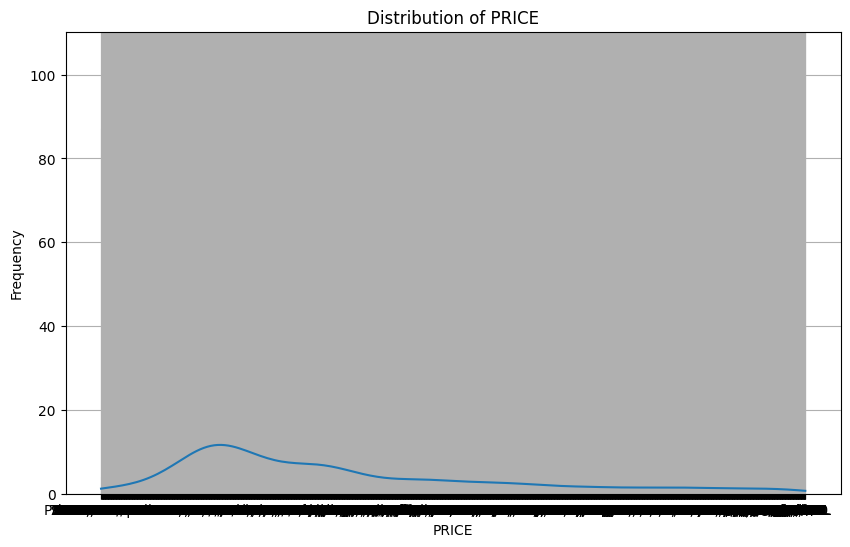

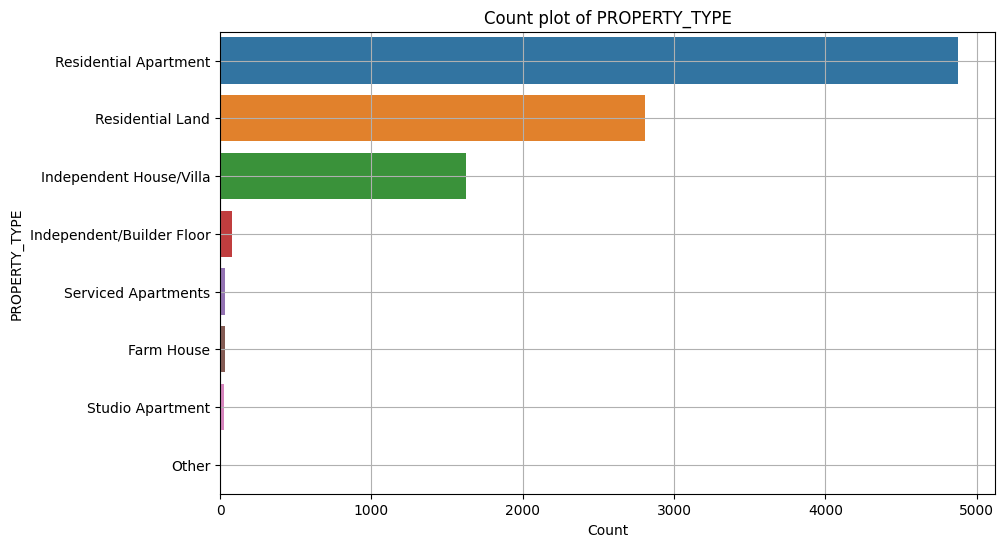

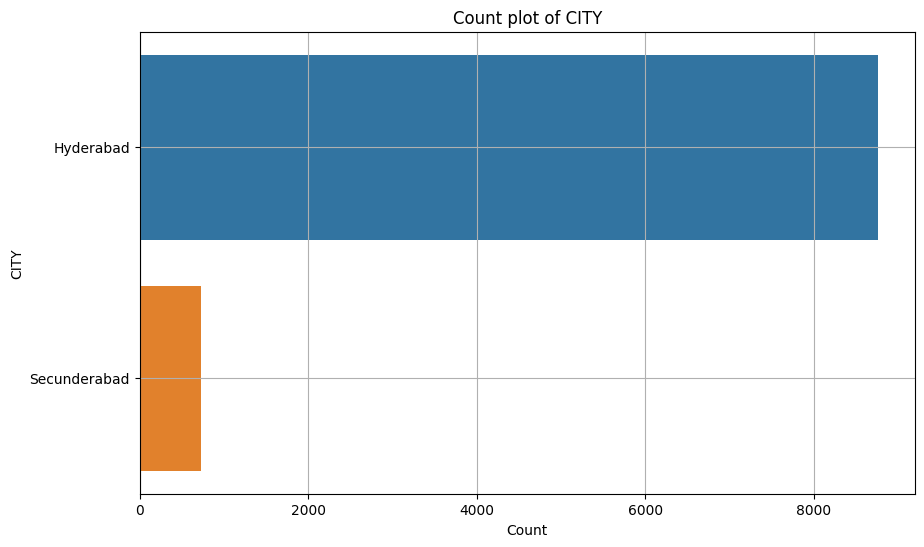

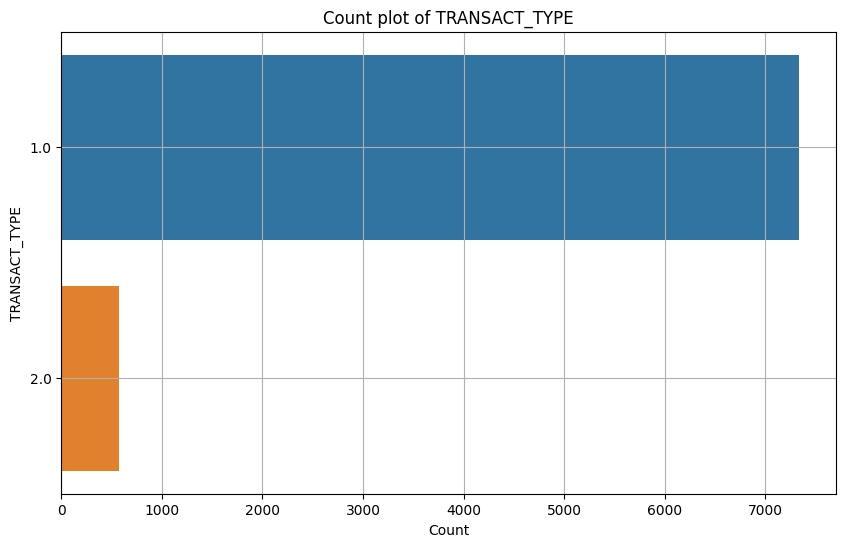

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a few columns that might be interesting and are less likely to have missing values
sample_numerical_cols = ['PRICE', 'BEDROOM', 'BATHROOM']  # assuming these are key features
sample_categorical_cols = ['PROPERTY_TYPE', 'CITY', 'TRANSACT_TYPE']  # common categorical features

# Plotting for numerical columns
for col in sample_numerical_cols:
    if col in data.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

# Count plots for categorical columns
for col in sample_categorical_cols:
    if col in data.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(y=data[col], order=data[col].value_counts().index)
        plt.title(f'Count plot of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.grid(True)
        plt.show()
plt.show()

### Preprocessing: Handling Missing Values

In [10]:
# Calculating the percentage of missing values in each column
missing_data_percentage = data.isnull().mean() * 100  # gives the percentage of missing values

# Filtering to show only columns with missing values
missing_data_summary = missing_data_percentage[missing_data_percentage > 0].sort_values(ascending=False)

missing_data_summary


FLOOR_NUM                     47.096026
TOP_USPS                      43.375145
BALCONY_NUM                   34.710657
BEDROOM_NUM                   29.661642
PROP_NAME                     28.502161
SOCIETY_NAME                  28.502161
BUILDING_NAME                 28.502161
TOTAL_LANDMARK_COUNT          17.655739
FORMATTED_LANDMARK_DETAILS    17.655739
TRANSACT_TYPE                 16.612206
VALUE_LABEL                   16.443554
AMENITIES                     14.177295
ALT_TAG                       12.933488
TOTAL_FLOOR                    6.071466
POSTING_DATE                   2.550859
dtype: float64

In [11]:
import pandas as pd

# Drop the columns with excessive missing values (more than 70% missing)
threshold = 0.7
data_clean = data.dropna(thresh=len(data) * threshold, axis=1)

# Impute missing values for numerical columns with the column's mean
numerical_cols = data_clean.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    if data_clean[col].isnull().sum() > 0:  # if the column has missing values
        data_clean[col].fillna(data_clean[col].mean(), inplace=True)

# Impute missing values for categorical columns with the most frequent value (mode)
categorical_cols = data_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if data_clean[col].isnull().sum() > 0:  # if the column has missing values
        top = data_clean[col].describe()['top']  # most frequent value
        data_clean[col].fillna(top, inplace=True)

# Handle outliers using the Interquartile Range (IQR) method
for col in numerical_cols:
    Q1 = data_clean[col].quantile(0.25)
    Q3 = data_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers
    data_clean.loc[data_clean[col] < lower_bound, col] = lower_bound
    data_clean.loc[data_clean[col] > upper_bound, col] = upper_bound

# Now, data_clean contains your processed dataset


<ipython-input-11-1cb5f51e67d4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col].fillna(data_clean[col].mean(), inplace=True)
<ipython-input-11-1cb5f51e67d4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col].fillna(top, inplace=True)
<ipython-input-11-1cb5f51e67d4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col].fillna(top, inplace=True)
<ipython-input-11-1cb5f51e67d4>:18: SettingWithC

In [12]:
data_clean

,SPID,PROP_ID,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,PRICE_PER_UNIT_AREA,...,CLASS_LABEL,REGISTER_DATE__U,REGISTERED_DAYS,PRIMARY_TAGS,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location
0,70135726,Z70135726,S,"Hmda, rera approved residential apartments at ...",Residential Apartment,Secunderabad,1.0,1,2.926720,5700.0,...,Dealer,2023-07-08 22:01:14,1 month ago,['FEATURED'],"['READY TO MOVE', 'RESALE']",9.000000,[{'text': '1 Library'}],Evolve,Evolve,"{'CITY': '268', 'CITY_NAME': 'Secunderabad', '..."
1,68859723,A68489968,S,Own a 2 BHK apartment in Annes Fortune Greenho...,Residential Apartment,Hyderabad,1.0,1,2.926720,6000.0,...,Builder,2023-04-12 11:49:40,4 months ago,['FEATURED'],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",50.000000,"[{'text': '1 Shopping'}, {'text': '3 Religious...",Annes Fortune Greenhomes Swan,Annes Fortune Greenhomes Swan,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI..."
2,69555358,M69555358,S,This well-known project offers 4 BHK apartment...,Residential Apartment,Hyderabad,1.0,1,3.122134,0.0,...,Builder,2023-06-08 17:30:28,2 months ago,[],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",11.000000,"[{'text': '1 Metro Station'}, {'text': '1 Shop...",The Olympus,The Olympus,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI..."
3,69555352,P69555352,S,Enjoy a blissful living experience in The Olym...,Residential Apartment,Hyderabad,1.0,1,3.000000,20049.0,...,Builder,2023-06-08 17:30:27,2 months ago,[],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",11.000000,"[{'text': '1 Metro Station'}, {'text': '1 Shop...",The Olympus,The Olympus,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI..."
4,70237806,B70237806,S,Siva sai infra myra is a residential developme...,Independent House/Villa,Hyderabad,1.0,1,3.000000,8999.0,...,Builder,2023-07-14 16:16:56,1 month ago,[],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.000000,"[{'text': '2 Connectivities'}, {'text': '1 Edu...",Siva Sai Infra Myra,Siva Sai Infra Myra,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,68859723,X68337058,S,North and east facing approved open plots avai...,Residential Land,Hyderabad,1.0,1,3.048854,19000.0,...,Dealer,2023-06-27 13:25:04,2 months ago,[],"['EAST FACING', 'AUTHORITY APPROVED', 'IN GATE...",10.000000,"[{'text': '2 Hospitals'}, {'text': '1 Miscella...",Prestige High Fields,Prestige High Fields,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI..."
9483,68859723,E68336956,S,North and east facing approved open plots avai...,Residential Land,Hyderabad,1.0,1,3.048854,11000.0,...,Dealer,2023-06-27 13:25:04,2 months ago,[],"['EAST FACING', 'AUTHORITY APPROVED', 'IN GATE...",25.265489,"[{'text': '1 Metro Station'}, {'text': '1 Shop...",Prestige High Fields,Prestige High Fields,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI..."
9484,68859723,R65638162,R,"2bhk, independent building floor available for...",Independent/Builder Floor,Secunderabad,1.0,1,2.926720,15.0,...,Dealer,2023-06-28 00:00:00,1 month ago,[],"['FOR SINGLE MEN', 'FOR SINGLE WOMEN']",50.000000,"[{'text': '5 Religious Places'}, {'text': '8 A...",Prestige High Fields,Prestige High Fields,"{'CITY': '268', 'CITY_NAME': 'Secunderabad', '..."
9485,70874700,H70874700,S,A project by sora constructions\nGhmc & rera a...,Residential Apartment,Hyderabad,1.0,1,3.000000,6400.0,...,Dealer,2023-08-18 13:20:25,1 week ago,[],"['UNDER CONSTRUCTION', 'RESALE']",50.000000,"[{'text': '8 ATMs'}, {'text': '8 Hospitals'}, ...",Greenwoods Project,Greenwoods Project,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI..."


In [13]:
# Define the columns to drop
columns_to_drop = [
    'PROP_ID', 'PREFERENCE','DESCRIPTION','location',
]

# Drop the columns
data_clean = data_clean.drop(columns=columns_to_drop)

# Display the first few rows of the modified dataframe to verify
data_clean.head()

,SPID,PROPERTY_TYPE,CITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,FACING,AGE,...,CLASS_HEADING,CLASS_LABEL,REGISTER_DATE__U,REGISTERED_DAYS,PRIMARY_TAGS,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME
0,70135726,Residential Apartment,Secunderabad,1.0,1,2.926720,5700.0,2,4.0,1.0,...,Dealer: Rainbow Developers,Dealer,2023-07-08 22:01:14,1 month ago,['FEATURED'],"['READY TO MOVE', 'RESALE']",9.0,[{'text': '1 Library'}],Evolve,Evolve
1,68859723,Residential Apartment,Hyderabad,1.0,1,2.926720,6000.0,0,1.5,5.0,...,Builder,Builder,2023-04-12 11:49:40,4 months ago,['FEATURED'],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",50.0,"[{'text': '1 Shopping'}, {'text': '3 Religious...",Annes Fortune Greenhomes Swan,Annes Fortune Greenhomes Swan
2,69555358,Residential Apartment,Hyderabad,1.0,1,3.122134,0.0,0,1.5,5.0,...,Builder,Builder,2023-06-08 17:30:28,2 months ago,[],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",11.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...",The Olympus,The Olympus
3,69555352,Residential Apartment,Hyderabad,1.0,1,3.000000,20049.0,0,1.5,5.0,...,Builder,Builder,2023-06-08 17:30:27,2 months ago,[],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",11.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...",The Olympus,The Olympus
4,70237806,Independent House/Villa,Hyderabad,1.0,1,3.000000,8999.0,0,1.5,5.0,...,Builder,Builder,2023-07-14 16:16:56,1 month ago,[],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0,"[{'text': '2 Connectivities'}, {'text': '1 Edu...",Siva Sai Infra Myra,Siva Sai Infra Myra


In [12]:
column_names = data_clean.columns.tolist()
print(column_names)

['SPID', 'PROPERTY_TYPE', 'CITY', 'TRANSACT_TYPE', 'OWNTYPE', 'BEDROOM_NUM', 'PRICE_PER_UNIT_AREA', 'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'FEATURES', 'REGISTER_DATE', 'POSTING_DATE', 'UPDATE_DATE', 'CLASS', 'RES_COM', 'PROP_NAME', 'PROPERTY_NUMBER', 'MIN_PRICE', 'MAX_PRICE', 'PRICE_SQFT', 'PROJ_ID', 'BUILDING_ID', 'VERIFIED', 'MAP_DETAILS', 'MIN_AREA_SQFT', 'MAX_AREA_SQFT', 'AMENITIES', 'ALT_TAG', 'PRODUCT_TYPE', 'EXPIRY_DATE', 'PROPERTY_TYPE__U', 'AREA', 'SECONDARY_AREA', 'PRICE', 'PROP_HEADING', 'VALUE_LABEL', 'CLASS_HEADING', 'CLASS_LABEL', 'REGISTER_DATE__U', 'REGISTERED_DAYS', 'PRIMARY_TAGS', 'SECONDARY_TAGS', 'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS', 'SOCIETY_NAME', 'BUILDING_NAME']


In [14]:
# Define the columns to drop
columns_to_drop = [
    'SOCIETY_NAME',
    'BUILDING_NAME',
    'FURNISH',
]

# Drop the columns
data_clean = data_clean.drop(columns=columns_to_drop)

# Display the first few rows of the modified dataframe to verify
data_clean.head()

,SPID,PROPERTY_TYPE,CITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FACING,AGE,TOTAL_FLOOR,...,PROP_HEADING,VALUE_LABEL,CLASS_HEADING,CLASS_LABEL,REGISTER_DATE__U,REGISTERED_DAYS,PRIMARY_TAGS,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS
0,70135726,Residential Apartment,Secunderabad,1.0,1,2.926720,5700.0,4.0,1.0,5.0,...,2 BHK Flat in Gundlapochampalli,Freehold,Dealer: Rainbow Developers,Dealer,2023-07-08 22:01:14,1 month ago,['FEATURED'],"['READY TO MOVE', 'RESALE']",9.0,[{'text': '1 Library'}]
1,68859723,Residential Apartment,Hyderabad,1.0,1,2.926720,6000.0,1.5,5.0,20.0,...,2 BHK Flat in Nizampet,Freehold,Builder,Builder,2023-04-12 11:49:40,4 months ago,['FEATURED'],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",50.0,"[{'text': '1 Shopping'}, {'text': '3 Religious..."
2,69555358,Residential Apartment,Hyderabad,1.0,1,3.122134,0.0,1.5,5.0,20.0,...,4 BHK Flat in Nanakramguda,Freehold,Builder,Builder,2023-06-08 17:30:28,2 months ago,[],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",11.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop..."
3,69555352,Residential Apartment,Hyderabad,1.0,1,3.000000,20049.0,1.5,5.0,20.0,...,3 BHK Flat in Nanakramguda,Freehold,Builder,Builder,2023-06-08 17:30:27,2 months ago,[],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",11.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop..."
4,70237806,Independent House/Villa,Hyderabad,1.0,1,3.000000,8999.0,1.5,5.0,0.0,...,3 Bedroom House in Kollur,Freehold,Builder,Builder,2023-07-14 16:16:56,1 month ago,[],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0,"[{'text': '2 Connectivities'}, {'text': '1 Edu..."


In [15]:
column_names = data_clean.columns.tolist()
print(column_names)

['SPID', 'PROPERTY_TYPE', 'CITY', 'TRANSACT_TYPE', 'OWNTYPE', 'BEDROOM_NUM', 'PRICE_PER_UNIT_AREA', 'FACING', 'AGE', 'TOTAL_FLOOR', 'FEATURES', 'REGISTER_DATE', 'POSTING_DATE', 'UPDATE_DATE', 'CLASS', 'RES_COM', 'PROP_NAME', 'PROPERTY_NUMBER', 'MIN_PRICE', 'MAX_PRICE', 'PRICE_SQFT', 'PROJ_ID', 'BUILDING_ID', 'VERIFIED', 'MAP_DETAILS', 'MIN_AREA_SQFT', 'MAX_AREA_SQFT', 'AMENITIES', 'ALT_TAG', 'PRODUCT_TYPE', 'EXPIRY_DATE', 'PROPERTY_TYPE__U', 'AREA', 'SECONDARY_AREA', 'PRICE', 'PROP_HEADING', 'VALUE_LABEL', 'CLASS_HEADING', 'CLASS_LABEL', 'REGISTER_DATE__U', 'REGISTERED_DAYS', 'PRIMARY_TAGS', 'SECONDARY_TAGS', 'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS']


In [16]:
# Define the columns to drop
columns_to_drop = [
    'FACING',
    'REGISTER_DATE',
    'PROP_NAME',

    'MAP_DETAILS',
    'AMENITIES',
    'EXPIRY_DATE',
    'PROP_HEADING',
    'CLASS_HEADING',
    'CLASS_LABEL',
    'SECONDARY_TAGS',
    'FORMATTED_LANDMARK_DETAILS',
    ]

# Drop the columns
data_clean = data_clean.drop(columns=columns_to_drop)

# Display the first few rows of the modified dataframe to verify
data_clean.head()

,SPID,PROPERTY_TYPE,CITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,PRICE_PER_UNIT_AREA,AGE,TOTAL_FLOOR,FEATURES,...,PRODUCT_TYPE,PROPERTY_TYPE__U,AREA,SECONDARY_AREA,PRICE,VALUE_LABEL,REGISTER_DATE__U,REGISTERED_DAYS,PRIMARY_TAGS,TOTAL_LANDMARK_COUNT
0,70135726,Residential Apartment,Secunderabad,1.0,1,2.926720,5700.0,1.0,5.0,"23,24,5,17,6,20,21",...,PREMIUM_LISTING,1,1215 sq.ft.,112.88 sq.m.,69.25 L,Freehold,2023-07-08 22:01:14,1 month ago,['FEATURED'],9.0
1,68859723,Residential Apartment,Hyderabad,1.0,1,2.926720,6000.0,5.0,20.0,N,...,PSEUDO_LISTING,1,1155-1395 sq.ft.,107.3-129.6 sq.m.,69.3 - 83.7 L,Freehold,2023-04-12 11:49:40,4 months ago,['FEATURED'],50.0
2,69555358,Residential Apartment,Hyderabad,1.0,1,3.122134,0.0,5.0,20.0,N,...,PSEUDO_LISTING,1,2880-3000 sq.ft.,267.56-278.71 sq.m.,Price on Request,Freehold,2023-06-08 17:30:28,2 months ago,[],11.0
3,69555352,Residential Apartment,Hyderabad,1.0,1,3.000000,20049.0,5.0,20.0,N,...,PSEUDO_LISTING,1,2010-2020 sq.ft.,186.74-187.66 sq.m.,2.02 - 2.02 Cr,Freehold,2023-06-08 17:30:27,2 months ago,[],11.0
4,70237806,Independent House/Villa,Hyderabad,1.0,1,3.000000,8999.0,5.0,0.0,N,...,PSEUDO_LISTING,2,2688-3192 sq.ft.,249.72-296.55 sq.m.,2.42 - 2.87 Cr,Freehold,2023-07-14 16:16:56,1 month ago,[],8.0


In [17]:
column_names = data_clean.columns.tolist()
print(column_names)

['SPID', 'PROPERTY_TYPE', 'CITY', 'TRANSACT_TYPE', 'OWNTYPE', 'BEDROOM_NUM', 'PRICE_PER_UNIT_AREA', 'AGE', 'TOTAL_FLOOR', 'FEATURES', 'POSTING_DATE', 'UPDATE_DATE', 'CLASS', 'RES_COM', 'PROPERTY_NUMBER', 'MIN_PRICE', 'MAX_PRICE', 'PRICE_SQFT', 'PROJ_ID', 'BUILDING_ID', 'VERIFIED', 'MIN_AREA_SQFT', 'MAX_AREA_SQFT', 'ALT_TAG', 'PRODUCT_TYPE', 'PROPERTY_TYPE__U', 'AREA', 'SECONDARY_AREA', 'PRICE', 'VALUE_LABEL', 'REGISTER_DATE__U', 'REGISTERED_DAYS', 'PRIMARY_TAGS', 'TOTAL_LANDMARK_COUNT']


In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding categorical variables
categorical_cols = data_clean.select_dtypes(include=['object']).columns

label_encoders = {}  # saving the encoders in a dictionary
for col in categorical_cols:
    le = LabelEncoder()
    data_clean[col] = le.fit_transform(data_clean[col])
    label_encoders[col] = le  # storing the label encoder for future reference

# Scaling numerical variables
scaler = StandardScaler()
numerical_cols = data_clean.select_dtypes(include=['float64', 'int64']).columns
data_clean[numerical_cols] = scaler.fit_transform(data_clean[numerical_cols])

# Now, data_clean contains your processed dataset

### Clustering and Anomaly Detection



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

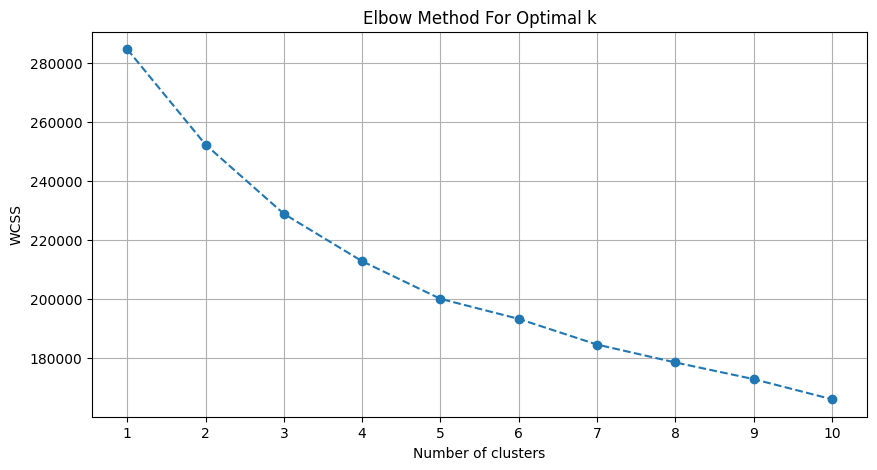

In [19]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# First, let's find the optimal number of clusters using the Elbow method.
wcss = []
for i in range(1, 11):  # testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_clean)  # data_clean is your preprocessed dataset from earlier steps
    wcss.append(kmeans.inertia_)

# Plot the "elbow" graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(list(range(1, 11)))
plt.grid(True)
plt.show()


In [20]:
# From the plot, you should select the number where the decrease in WCSS begins to slow down (elbow point)
# Let's assume it's 3 for the next steps; please replace it with the correct number based on your observation.

optimal_clusters = 2  # replace with the actual optimal number based on your plot

# Now apply K-Means clustering with the selected number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
data_clusters = kmeans.fit_predict(data_clean)

# Add the clusters as a new column in your dataframe
data_clean['Cluster'] = data_clusters

# Check the first few rows of your dataframe
print(data_clean.head())

# You can also check the size of each cluster
print(np.bincount(data_clusters))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       SPID  PROPERTY_TYPE      CITY  TRANSACT_TYPE  OWNTYPE  BEDROOM_NUM  \
0 -0.096295       0.169269  3.476423            0.0      0.0    -1.461879   
1 -2.057202       0.169269 -0.287652            0.0      0.0    -1.461879   
2 -0.988180       0.169269 -0.287652            0.0      0.0     1.724530   
3 -0.988189       0.169269 -0.287652            0.0      0.0    -0.266976   
4  0.060577      -1.997874 -0.287652            0.0      0.0    -0.266976   

   PRICE_PER_UNIT_AREA       AGE  TOTAL_FLOOR  FEATURES  ...  \
0            -0.548158 -0.680005    -0.530121 -0.694281  ...   
1            -0.517711  0.937852     1.059791  1.561287  ...   
2            -1.126664  0.937852     1.059791  1.561287  ...   
3             0.908152  0.937852     1.059791  1.561287  ...   
4            -0.213336  0.937852    -1.060091  1.561287  ...   

   PROPERTY_TYPE__U      AREA  SECONDARY_AREA     PRICE  VALUE_LABEL  \
0         -0.854758 -1.261893       -1.312550  1.035147    -0.052221   
1       

### Feature Engineering

In [21]:
column_names = data_clean.columns.tolist()
print(column_names)

['SPID', 'PROPERTY_TYPE', 'CITY', 'TRANSACT_TYPE', 'OWNTYPE', 'BEDROOM_NUM', 'PRICE_PER_UNIT_AREA', 'AGE', 'TOTAL_FLOOR', 'FEATURES', 'POSTING_DATE', 'UPDATE_DATE', 'CLASS', 'RES_COM', 'PROPERTY_NUMBER', 'MIN_PRICE', 'MAX_PRICE', 'PRICE_SQFT', 'PROJ_ID', 'BUILDING_ID', 'VERIFIED', 'MIN_AREA_SQFT', 'MAX_AREA_SQFT', 'ALT_TAG', 'PRODUCT_TYPE', 'PROPERTY_TYPE__U', 'AREA', 'SECONDARY_AREA', 'PRICE', 'VALUE_LABEL', 'REGISTER_DATE__U', 'REGISTERED_DAYS', 'PRIMARY_TAGS', 'TOTAL_LANDMARK_COUNT', 'Cluster']


In [22]:
data_clean['total_rooms'] = data_clean['BEDROOM_NUM']

### Machine Learning Model


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Assuming 'data_clean' is your DataFrame and you've already created 'total_rooms'

# Selecting the features and target
X = data_clean[['CITY', 'PROPERTY_TYPE', 'total_rooms', 'AGE', 'PRICE']]  # features
y = data_clean['PRICE_PER_UNIT_AREA']  # target

# Define which features are numerical and which are categorical
numerical_features = ['total_rooms', 'AGE', 'PRICE']  # these columns are numerical
categorical_features = ['CITY', 'PROPERTY_TYPE']  # these columns are categorical

# Define separate handling for categorical and numerical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # fills missing data with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Use ColumnTransformer to apply the transformations to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# Create a pipeline that first applies the preprocessor and then fits the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=0))
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model_pipeline.fit(X_train, y_train)

# Now, your model is trained with the features you've specified, and you can proceed with evaluating its performance.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['total_rooms', 'AGE',
                                                   'PRICE']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CITY', 'PROPERTY_TYPE'])])),
                ('regressor', RandomForestRegressor(random_state=0))])

Mean Absolute Error (MAE): 0.2974759852960971
Mean Squared Error (MSE): 0.33161343616208505
Root Mean Squared Error (RMSE): 0.5758588682672908
R-squared (R²): 0.6563722460968581


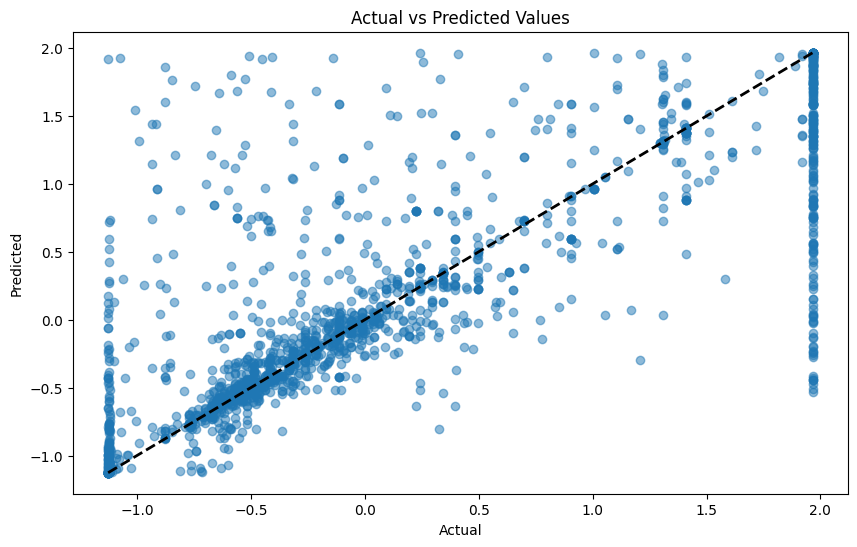

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # or use mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# You might also want to view actual vs predicted values through visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


In [25]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters you want to try out
param_grid = {
    'regressor__n_estimators': [100, 200, 300],  # number of trees in the forest
    'regressor__max_features': ['auto', 'sqrt'],  # number of features to consider when looking for the best split
    'regressor__max_depth': [10, 50, None],  # maximum depth of the tree
    'regressor__min_samples_split': [2, 5, 10],  # minimum number of samples required to split an internal node
    'regressor__min_samples_leaf': [1, 2, 4]  # minimum number of samples required to be at a leaf node
}

# Set up the grid search
grid_search = GridSearchCV(model_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the random search model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Use the best parameters for further training or evaluation


Fitting 3 folds for each of 162 candidates, totalling 486 fits


KeyboardInterrupt: ignored

In [28]:
# Re-training the model on the entire dataset
final_model = model_pipeline.set_params(**grid_search.best_params_)  # if you've used hyperparameter tuning
final_model.fit(X, y)  # X and y should include all data points

# Note: If you've switched to a different model (like XGBoost) during optimization,
# make sure to initiate and use that specific model or pipeline here.


AttributeError: ignored

In [27]:
# Using cross-validation to evaluate the model
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the final model
cv_scores = cross_val_score(final_model, X, y, cv=5, scoring='neg_mean_squared_error')  # Adjust scoring if necessary

print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean()}")


NameError: ignored

In [ ]:
import joblib

# Save your model to a file
filename = 'finalized_model.pkl'
joblib.dump(final_model, filename)

# Load the model from the file (e.g., for deployment or further use)
loaded_model = joblib.load(filename)


In [26]:
# Convert to positive MSE scores
positive_mse_scores = -cv_scores  # negate the scores to get positive values
average_positive_mse = positive_mse_scores.mean()

# Calculate RMSE scores
rmse_scores = np.sqrt(positive_mse_scores)
average_rmse = rmse_scores.mean()

print(f"Positive MSE scores: {positive_mse_scores}")
print(f"Average Positive MSE: {average_positive_mse}")
print(f"RMSE scores: {rmse_scores}")
print(f"Average RMSE: {average_rmse}")


NameError: ignored